What is a Support Vector Machine?
A Support Vector Machine (SVM) is a supervised machine learning algorithm used for classification and regression tasks. It aims to find an optimal hyperplane or decision boundary that separates data points of different classes in a high-dimensional feature space. SVMs are known for their ability to handle both linearly separable and non-linearly separable data by using appropriate kernel functions.

What is a prerequisite for applying an SVM?
A prerequisite for applying an SVM is having labeled training data. SVMs are supervised learning algorithms that require input data with corresponding class labels. The training data is used to build the SVM model, which can then be used to make predictions on unseen data.

What are the two most important ideas for applying SVM to non-linear separable datasets?
The two most important ideas for applying SVM to non-linearly separable datasets are:
a) Kernel Trick: SVMs can apply a kernel function that maps the original feature space into a higher-dimensional space, where the data might become linearly separable. Common kernel functions include the Gaussian (RBF) kernel, polynomial kernel, and sigmoid kernel.
b) Soft Margin Classification: SVMs can allow for some misclassifications or overlapping of data points by introducing a slack variable and a regularization parameter. This softens the strict separation requirement and helps handle noisy or overlapping data.

Describe the basic structure of biological neurons.
Biological neurons are the fundamental building blocks of the nervous system. Each neuron consists of three main components:
a) Cell Body (Soma): It contains the nucleus and other essential organelles for the neuron's metabolic functions.
b) Dendrites: These are branched extensions that receive electrical signals (or inputs) from other neurons and transmit them toward the cell body.
c) Axon: It is a long, slender extension that carries the electrical signals away from the cell body and transmits them to other neurons through terminal branches called axon terminals.

How can a single artificial neuron be modeled?
A single artificial neuron, also known as a perceptron, can be modeled as follows:
a) Inputs: It takes multiple input values, each multiplied by a corresponding weight.
b) Weighted Sum: It computes the weighted sum of the inputs and weights.
c) Activation Function: It applies an activation function (e.g., sigmoid, step function) to the weighted sum, which introduces non-linearity and determines the neuron's output.
d) Bias: A bias term can be added to the weighted sum to adjust the decision boundary of the neuron.
e) Output: The output of the artificial neuron is the result of applying the activation function to the weighted sum.

How is an artificial neural network structured?
An artificial neural network (ANN) is structured as a collection of interconnected artificial neurons organized into layers. The typical structure consists of:
a) Input Layer: It receives the input data and passes it to the next layer.
b) Hidden Layers: These layers are in between the input and output layers and contain multiple artificial neurons. They perform complex computations and learn representations from the input data.
c) Output Layer: It produces the final output of the neural network, which can be in the form of classification probabilities or continuous values.
d) Weights and Biases: Each connection between neurons is associated with a weight, which determines the strength of the connection. Neurons also have bias terms that can influence their behavior.
e) Activation Functions: Non-linear activation functions are applied to the outputs of the neurons to introduce non-linearity into the network and enable learning complex patterns.
f) Forward Propagation: The data flows through the network from the input layer to the output layer, with computations being performed at each neuron.
g) Backpropagation: During training, the network adjusts the weights and biases using backpropagation, which involves calculating gradients and updating the parameters to minimize the difference between predicted and actual outputs.

Artificial neural networks are powerful models that can learn from data and perform tasks such as classification, regression, and pattern recognition.

In [18]:

"""

KURZER HINWEIS: FüR 2 und 3, ICH HABE BESCHLOSSEN, DAS WISSEN, DAS WIR AUF SKLEARN GELERNT HABEN, AUF MEINEN EIGENEN DATENSATZ ANZUWENDEN.


Der Datensatz sind die Preise von Bitcoin, ich wollte sehen, welcher der Algorithmen wirklich vorhersagen kann, ob btc
nach 3 Stunden einen höheren (1) oder niedrigeren (0) Preis haben wird.

Ich habe festgestellt, dass ein MLPClassifier die höchste GenauigkeitL ~0,52 (was nicht wirklich beeindruckend ist)

"""

import pandas as pd
import numpy as np
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, recall_score, f1_score
import matplotlib.pyplot as plt

df = pd.read_csv('./btcdata.csv')
df = df[df.Volume != 0]
df['Local time'] = pd.to_datetime(df['Local time'], format="%d.%m.%Y %H:%M:%S.%f GMT%z")
df = df.drop(['Local time'], axis=1)
res = np.where(df.Close > df.Open, 1 , 0)
df = df.iloc[:-1]
df = df.dropna()
df.reset_index()
res = np.roll(res, -1)[:-1]
train_index = int(0.7 * len(res))
test_index = len(res) - train_index
X_train, X_test = df[:train_index], df[train_index:]
y_train, y_test = res[:train_index], res[train_index:]
df['y'] = res
df.tail(5)

,Open,High,Low,Close,Volume,y
14755,26787,26813,26701,26723,52.746,1
14756,26723,26879,26678,26875,128.258,0
14757,26875,26948,26621,26751,31.552,1
14758,26751,27942,26716,27761,116.155,1
14759,27761,28221,27753,28131,296.941,1


In [19]:
best_vals = {'layers': 0, 'accuracy': 0, 'recall': 0, 'f1': 0}
for i in range(1,101):
    network = MLPClassifier(hidden_layer_sizes=(i,), activation='relu', random_state=1, max_iter=700 )
    network.fit(X_train,y_train)
    y_pred = network.predict(X_test)
    if accuracy_score(y_test, y_pred) > best_vals.get('accuracy'):
        best_vals['layers'] = i
        best_vals['accuracy'] = accuracy_score(y_test, y_pred)
        best_vals['recall'] = recall_score(y_test, y_pred)
        best_vals['f1'] = f1_score(y_test, y_pred)
best_vals

{'layers': 7,
 'accuracy': 0.5265750583354939,
 'recall': 0.6136716727084413,
 'f1': 0.5648236415633937}

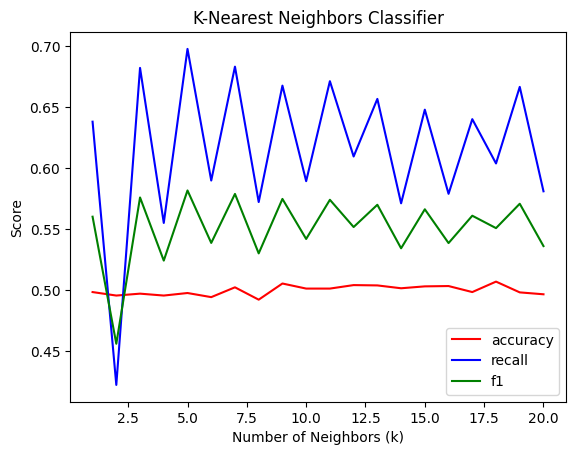

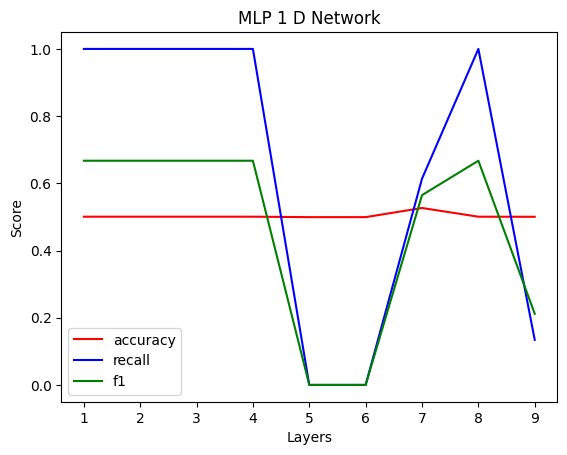

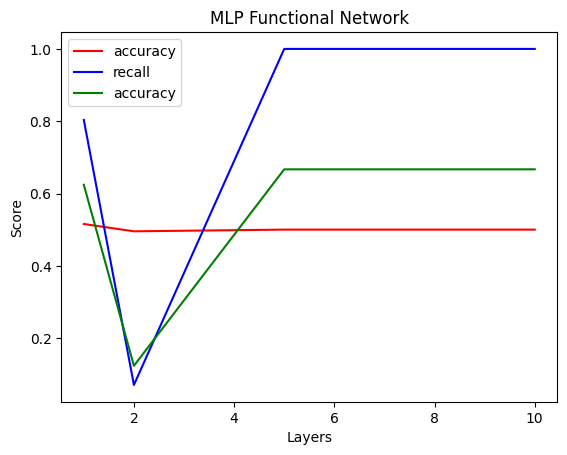

 KNN Highest Accuracy:  0.5071298936997667 
 MLP 1 D Network Highest Accuracy:  0.5265750583354939 
 MLP Functional Network Highest Accuracy:  0.516204303863106


In [12]:
knn_accuracy_scores = {'accuracy': [], 'recall': [], 'f1': []}

for k in range(1, 21):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    knn_accuracy_scores['accuracy'].append(accuracy_score(y_test, y_pred))
    knn_accuracy_scores['recall'].append(recall_score(y_test,y_pred))
    knn_accuracy_scores['f1'].append(f1_score(y_test,y_pred))

plt.figure()
plt.plot(range(1,21), knn_accuracy_scores['accuracy'], c='red', label = 'accuracy')
plt.plot(range(1,21), knn_accuracy_scores['recall'], c='blue', label = 'recall')
plt.plot(range(1,21), knn_accuracy_scores['f1'], c='green', label = 'f1')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Score')
plt.title('K-Nearest Neighbors Classifier')
plt.legend()
plt.show()



mlp_accuracy_scores = {'accuracy': [], 'recall': [], 'f1': []}
for i in range(1,10):
    mlp = MLPClassifier(hidden_layer_sizes=(i,), activation='relu', random_state=1, max_iter=700 )
    mlp.fit(X_train,y_train)
    y_pred = mlp.predict(X_test)
    mlp_accuracy_scores['accuracy'].append(accuracy_score(y_test, y_pred))
    mlp_accuracy_scores['recall'].append(recall_score(y_test,y_pred))
    mlp_accuracy_scores['f1'].append(f1_score(y_test,y_pred))

plt.figure()
plt.plot(range(1,10),mlp_accuracy_scores['accuracy'], label='accuracy', c='red')
plt.plot(range(1,10),mlp_accuracy_scores['recall'], label='recall', c='blue')
plt.plot(range(1,10),mlp_accuracy_scores['f1'], label='f1', c='green')
plt.xlabel('Layers')
plt.ylabel('Score')
plt.title('MLP 1 D Network')
plt.legend()
plt.show()


mlp_accuracy_scores_2d = {'accuracy': [], 'recall': [], 'f1': []}
for i in [1,2,5,10]:
    mlp = MLPClassifier(hidden_layer_sizes=(100,) * i, activation='relu', random_state=1, max_iter=700 )
    mlp.fit(X_train,y_train)
    y_pred = mlp.predict(X_test)
    mlp_accuracy_scores_2d['accuracy'].append(accuracy_score(y_test, y_pred))
    mlp_accuracy_scores_2d['recall'].append(recall_score(y_test,y_pred))
    mlp_accuracy_scores_2d['f1'].append(f1_score(y_test,y_pred))

plt.figure()
plt.plot([1,2,5,10],mlp_accuracy_scores_2d['accuracy'], label='accuracy', c='red')
plt.plot([1,2,5,10],mlp_accuracy_scores_2d['recall'], label='recall', c='blue')
plt.plot([1,2,5,10],mlp_accuracy_scores_2d['f1'], label='accuracy', c='green')
plt.xlabel('Layers')
plt.ylabel('Score')
plt.title('MLP Functional Network')
plt.legend()
plt.show()


print(' KNN Highest Accuracy: ', max(knn_accuracy_scores['accuracy']), '\n', 'MLP 1 D Network Highest Accuracy: ', max(mlp_accuracy_scores['accuracy']), '\n', 'MLP Functional Network Highest Accuracy: ', max(mlp_accuracy_scores_2d['accuracy']))